In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

1) df_tips içindeki Payment ID column'unun son 3 rakamını çekin. Bu işlemi 3 farklı yolla da yapmaya çalışın.

In [2]:
df_tips = pd.read_csv("tips.csv")  ; df_tips.head(3)


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


In [3]:
df_tips["Payment ID"].apply(lambda x : x[-3:]) # apply ile

0      959
1      608
2      458
3      260
4      251
      ... 
239    657
240    766
241    880
242    t17
243    672
Name: Payment ID, Length: 244, dtype: object

In [4]:
df_tips["Payment ID"].str[-3:] #str method ile , vektorize yöntem

0      959
1      608
2      458
3      260
4      251
      ... 
239    657
240    766
241    880
242    t17
243    672
Name: Payment ID, Length: 244, dtype: object

In [5]:
df_tips["Payment ID"].map(lambda x : x[-3:]) # map ile

0      959
1      608
2      458
3      260
4      251
      ... 
239    657
240    766
241    880
242    t17
243    672
Name: Payment ID, Length: 244, dtype: object

2) df_tips içindeki Payer Name sütununda isim ve soy isim bilgileri bulunuyor. O sütundan sadece isim bilgileri çekin ve 'JustName' adında yeni bir column oluşturun. (Bu biraz zorlayıcı olabilir, Önce kendiniz yapmaya çalışın fakat yapamazsanız ChatGPT'ye soruyu düzgünce sorarak cevabını kod olarak alabilirsiniz, ardından döndürülen kodu anlamaya çalışmanız yeterlidir.)

In [6]:
df_tips["JustName"] = df_tips["Payer Name"].str.split().str[0]

In [7]:
df_tips["Payer Name"].apply(lambda x : x.split()[0]) # apply series ve dataframe ler ile çalışabilir daha esnektir.

0        Christy
1        Douglas
2         Travis
3      Nathaniel
4          Tonya
         ...    
239      Michael
240       Monica
241        Keith
242       Dennis
243     Michelle
Name: Payer Name, Length: 244, dtype: object

In [8]:
df_tips["Payer Name"].map(lambda x : x.split()[0]) # map sadece series ile çalışır

0        Christy
1        Douglas
2         Travis
3      Nathaniel
4          Tonya
         ...    
239      Michael
240       Monica
241        Keith
242       Dennis
243     Michelle
Name: Payer Name, Length: 244, dtype: object

3) 2.Soruda yeni oluşturduğunuz 'JustName' sütunundaki verilerin her birinden kaç tane olduğuna uygun methodu kullanarak bakın.

In [9]:
df_tips["JustName"].value_counts()

JustName
Jason          9
Michael        7
James          6
David          6
Christopher    5
              ..
Shawna         1
Louis          1
Chris          1
Mark           1
Michelle       1
Name: count, Length: 153, dtype: int64

In [10]:
df_tips.groupby("JustName").size().sort_values(ascending= False)

JustName
Jason          9
Michael        7
James          6
David          6
Christopher    5
              ..
Heather        1
Grant          1
Gordon         1
Glenn          1
Kelly          1
Length: 153, dtype: int64

4) 3.Soruda gördüğünüz gibi JustName sütununda 'Jason' isminden 9 tane, 'Michael' isminden 7 tane , 'James' isminden 6 tane bulunuyor. Peki bunların hepsi gerçekten farklı kişiler mi ? Hemen 'Payer Name' sütunundaki verilerin adetlerini de saydırtarak bir kıyaslama yapın. 'JustName' sütununu kullanmanın faydasız ve yanıltıcı olabileceğini görün ardından oluşturduğumuz 'JustName' sütununu kalıcı olarak drop edin. (Oluşturmanız için bir pratikti bu sütun sadece :D)

In [11]:
df_tips["Payer Name"].value_counts().sort_values(ascending= False)
# df_tips.drop(columns=["JustName"],axis = 1,inplace=True)
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,JustName
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,Christy
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,Douglas
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,Travis
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,Nathaniel
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,Tonya


5) Erkeklerin ve kadınların davranış patternlerini ayrı ayrı inceleyip yorumda bulunabilmek için 'df_male' ve 'df_female' adında 2 dataframe oluşturun. Birinde sadece 157 erkek verisi, diğerinde sadece 87 kadın verisi bulunsun.

In [20]:
df_male = df_tips.query("sex == 'Male' ")
df_female = df_tips[df_tips["sex"] == "Female"]

6) Ardından bu 'df_male' ile 'df_female' 'in ödedikleri bahşişler toplamını bulup karşılaştırın

In [34]:
print(f"Erkek müşterilerin verdiği bahşiş miktarının toplamı : {df_male.tip.sum()}")
print(f"Erkek müşterilerin verdiği bahşiş miktarının toplamı : {round(df_female.tip.sum() , 2)}")
print(f"Erkeklerin verdiği bahşiş ile kadınların verdiği bahşişin oranı : {df_male.tip.sum()/df_female.tip.sum()}")

Erkek müşterilerin verdiği bahşiş miktarının toplamı : 485.07
Erkek müşterilerin verdiği bahşiş miktarının toplamı : 246.51
Erkeklerin verdiği bahşiş ile kadınların verdiği bahşişin oranı : 1.9677497870268956


7) 6.Soruda erkeklerin ve kadınların ödedikleri bahşişler toplamına bakıldığında Erkeklerin kadınlara kıyasla toplamda daha çok bahşiş ödediğini görüyoruz. Fakat biz biliyoruz ki bizim verimizde 157 Erkek, 87 kadın verisi vardı. Dolayısıyla Erkek sayısı daha fazla olduğu için toplam ödeyecekleri bahşiş miktarlarında da daha fazla çıkması oldukça normal bir durum. Bu yüzden daha mantıklı bir çıkarım için bu sefer df_male ile df_female'in bahşiş ORTALAMALARIN'a bakıp kıyaslayın, aralarında anlamlı ve ciddi bir fark var mı ?

In [35]:
print(f"Erkek müşterilerin verdiği bahşiş miktarının ortalaması  : {df_male.tip.mean()}")
print(f"Erkek müşterilerin verdiği bahşiş miktarının ortalaması : {df_female.tip.mean()}")

Erkek müşterilerin verdiği bahşiş miktarının ortalaması  : 3.0896178343949043
Erkek müşterilerin verdiği bahşiş miktarının ortalaması : 2.8334482758620685


8) Oluşturmuş olduğunuz df_male ile çalışarak elimizdeki verideki erkeklerin yüzde kaçının sigara içtiğini bulun. Aynı şekilde elimizdeki kadınların yüzde kaçının sigara içtiğini de bulun. Aralarında anlamlı bir fark mı yorumlayın.

In [46]:
smoking_males = df_male[df_male["smoker"] == "Yes"].shape[0]
total_males = df_male.shape[0]
percentage_smoking_males = (smoking_males / total_males) * 100
print(f"Erkeklerin yüzde {percentage_smoking_males:.2f}'i sigara içiyor.") # round yerine tercih edebilirsin.

Erkeklerin yüzde 38.22'i sigara içiyor.


9) Erkeklerin zaman olarak dinnerda mı yoksa lunch'da mı daha fazla yemek yediğini yüzdesel olarak bulun. Aynı işlemi kadınlar için de yapın. Yüzdesel olarak erkeklerin ve kadınların yemek yeme vakitleri arasında anlamlı bir fark var mı yok mu yorumlayın.

In [63]:
dinner_males = (df_male["time"] == "Dinner").sum()
print(f"{dinner_males} erkek Dinner terch etmiş yani yüzde {(dinner_males/total_males)*100:.2f} kadarı")

lunch_males = len(df_male.query("time == 'Lunch'"))
print(f"{lunch_males} erkek Lunch terch etmiş yani yüzde {(lunch_males/total_males)*100:.2f} kadarı")

total_females = df_female.shape[0]
dinner_females = df_female.groupby("time").size().loc["Dinner"]
print(f"{dinner_females} kadın Dinner terch etmiş yani yüzde {(dinner_females/total_females)*100:.2f} kadarı")

lunch_females = (df_female["time"] == "Lunch").sum()
print(f"{lunch_females} kadın Lunch terch etmiş yani yüzde {(lunch_females/total_females)*100:.2f} kadarı")

124 erkek Dinner terch etmiş yani yüzde 78.98 kadarı
33 erkek Lunch terch etmiş yani yüzde 21.02 kadarı
52 kadın Dinner terch etmiş yani yüzde 59.77 kadarı
35 kadın Lunch terch etmiş yani yüzde 40.23 kadarı


In [ ]:
# farklı eleman sayma yöntemleri denedim . en çok query yöntemi hoşuma gitti tabii bir de shape[0] güzel.
#groupby çok tercih edilmez heralde ama basit olduğundan denemiş olduk.

10) CC Number sütununu kalıcı olarak drop edin. Ardından df'in içindeki sütunların birbirleriyle olan ilişkilerini inceleyin ve çıkan sonuçlar hakkında yorumlarınızı belirtin.

In [65]:
df_tips.drop(columns = "CC Number" , axis = 1, inplace = True)

In [67]:
df_tips.corr(numeric_only=True)

,total_bill,tip,size,price_per_person
total_bill,1.000000,0.675734,0.598315,0.647554
tip,0.675734,1.000000,0.489299,0.347405
size,0.598315,0.489299,1.000000,-0.175359
price_per_person,0.647554,0.347405,-0.175359,1.000000


<Axes: >

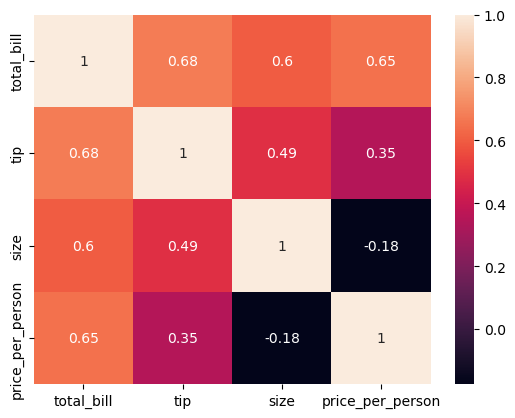

In [75]:
sns.heatmap(df_tips.corr(numeric_only=True) ,annot = True ,)